# FA & Clustering

## FA

요인수를 선택해야 한다...
* 속성값들
* 클러스터링 되는 애들

In [31]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# 데이터 가져오기
internalMetrics_df = pd.read_csv('result_rdb_internal_4.csv')

In [33]:
# 확인
internalMetrics_df.head()

,redis_version,redis_git_sha1,redis_git_dirty,redis_build_id,redis_mode,os,arch_bits,multiplexing_api,atomicvar_api,gcc_version,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,21.092774,6.039113,0.0,0.0,0,249666,0,0
1,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,20.643600,6.038766,0.0,0.0,0,249666,0,0
2,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,20.923632,5.806548,0.0,0.0,0,249666,0,0
3,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,22.507727,6.583683,0.0,0.0,0,249666,0,0
4,5.0.2,0,0,24934926e99aa4a4,standalone,Linux 4.15.0-1098-gcp x86_64,64,epoll,atomic-builtin,5.4.0,...,0,0,20.708273,5.782973,0.0,0.0,0,249666,0,0


## 변수 선택
### 버전 환경 관련
* redis_version
* redis_builid_id
* os
* gcc_version
* Executable
* config_file
* tcp_port
* run_id
* process_id

In [34]:
# 버전, 환경 관련 변수
var1_noRel = [
    'redis_version', 
    'redis_build_id', 
    'os',
    'gcc_version',
    'executable',
    'config_file',
    'tcp_port',
    'run_id',
    'process_id',
    'master_replid'
]

In [35]:
# 버전, 환경 관련 변수 확인
var1_noRel

['redis_version',
 'redis_build_id',
 'os',
 'gcc_version',
 'executable',
 'config_file',
 'tcp_port',
 'run_id',
 'process_id',
 'master_replid']

In [36]:
# 변수 제거 
internalMetrics_df = internalMetrics_df.drop(columns = var1_noRel, axis=0)

In [37]:
# 변수 제거 데이터프레임 확인
internalMetrics_df.head()

,redis_git_sha1,redis_git_dirty,redis_mode,arch_bits,multiplexing_api,atomicvar_api,uptime_in_seconds,uptime_in_days,hz,configured_hz,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,0,0,standalone,64,epoll,atomic-builtin,38,0,30,30,...,0,0,21.092774,6.039113,0.0,0.0,0,249666,0,0
1,0,0,standalone,64,epoll,atomic-builtin,37,0,18,18,...,0,0,20.643600,6.038766,0.0,0.0,0,249666,0,0
2,0,0,standalone,64,epoll,atomic-builtin,38,0,39,39,...,0,0,20.923632,5.806548,0.0,0.0,0,249666,0,0
3,0,0,standalone,64,epoll,atomic-builtin,42,0,6,6,...,0,0,22.507727,6.583683,0.0,0.0,0,249666,0,0
4,0,0,standalone,64,epoll,atomic-builtin,38,0,35,35,...,0,0,20.708273,5.782973,0.0,0.0,0,249666,0,0


### 모두 동일한 값
fa의 경우 모두 동일한 값이 존재하면 실행 시 오류 발생

In [38]:
# 모두 동일한 값 가지고 있는 변수 리스트
sameValue_var = []

for metric in internalMetrics_df:
    if len(internalMetrics_df[metric].unique()) == 1:
        sameValue_var.append(metric)

sameValue_var

['redis_git_sha1',
 'redis_git_dirty',
 'redis_mode',
 'arch_bits',
 'multiplexing_api',
 'atomicvar_api',
 'uptime_in_days',
 'connected_clients',
 'client_recent_max_output_buffer',
 'blocked_clients',
 'used_memory_human',
 'used_memory_dataset_perc',
 'total_system_memory',
 'total_system_memory_human',
 'used_memory_lua',
 'used_memory_lua_human',
 'used_memory_scripts',
 'used_memory_scripts_human',
 'number_of_cached_scripts',
 'maxmemory',
 'maxmemory_human',
 'allocator_frag_ratio',
 'mem_not_counted_for_evict',
 'mem_replication_backlog',
 'mem_clients_slaves',
 'mem_clients_normal',
 'mem_aof_buffer',
 'mem_allocator',
 'active_defrag_running',
 'lazyfree_pending_objects',
 'loading',
 'rdb_last_bgsave_status',
 'aof_enabled',
 'aof_rewrite_in_progress',
 'aof_rewrite_scheduled',
 'aof_last_rewrite_time_sec',
 'aof_current_rewrite_time_sec',
 'aof_last_bgrewrite_status',
 'aof_last_write_status',
 'aof_last_cow_size',
 'total_connections_received',
 'total_commands_processed

In [39]:
# 동일 값 변수 제거
internalMetrics_df = internalMetrics_df.drop(columns = sameValue_var, axis = 0)

In [40]:
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,client_recent_max_input_buffer,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_hits,keyspace_misses,latest_fork_usec,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children
0,38,30,30,10269216,2,38903296,43397120,41.39,38963896,37.16,...,5049038,1077.04,76.71,743,499257,0,21.092774,6.039113,0.0,0.0
1,37,18,18,10269260,2,38903296,43208704,41.21,38963896,37.16,...,5048972,1946.91,138.64,742,499258,0,20.643600,6.038766,0.0,0.0
2,38,39,39,10269304,2,38903296,43352064,41.34,38963896,37.16,...,5049038,1273.88,90.49,743,499257,0,20.923632,5.806548,0.0,0.0
3,42,6,6,10269353,2,38903296,43245568,41.24,38963896,37.16,...,5049038,1308.64,93.12,743,499257,0,22.507727,6.583683,0.0,0.0
4,38,35,35,10269397,2,38903296,43560960,41.54,38963888,37.16,...,5049038,889.35,63.59,743,499257,0,20.708273,5.782973,0.0,0.0


In [41]:
# 변수 개수 확인
len(internalMetrics_df.columns)

42

In [42]:
internalMetrics_df.dtypes

uptime_in_seconds                   int64
hz                                  int64
configured_hz                       int64
lru_clock                           int64
client_recent_max_input_buffer      int64
used_memory                         int64
used_memory_rss                     int64
used_memory_rss_human             float64
used_memory_peak                    int64
used_memory_peak_human            float64
used_memory_peak_perc             float64
used_memory_overhead                int64
used_memory_startup                 int64
used_memory_dataset                 int64
allocator_allocated                 int64
allocator_active                    int64
allocator_resident                  int64
maxmemory_policy                   object
allocator_frag_bytes                int64
allocator_rss_ratio               float64
allocator_rss_bytes                 int64
rss_overhead_ratio                float64
rss_overhead_bytes                 uint64
mem_fragmentation_ratio           

### 범주형 변수 처리

In [43]:
import pandas as pd

In [44]:
internalMetrics_df = pd.get_dummies(internalMetrics_df)
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,client_recent_max_input_buffer,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,used_cpu_sys_children,used_cpu_user_children,maxmemory_policy_allkeys-lfu,maxmemory_policy_allkeys-lru,maxmemory_policy_allkeys-random,maxmemory_policy_noeviction,maxmemory_policy_volatile-lfu,maxmemory_policy_volatile-lru,maxmemory_policy_volatile-random,maxmemory_policy_volatile-ttl
0,38,30,30,10269216,2,38903296,43397120,41.39,38963896,37.16,...,0.0,0.0,0,0,0,1,0,0,0,0
1,37,18,18,10269260,2,38903296,43208704,41.21,38963896,37.16,...,0.0,0.0,0,1,0,0,0,0,0,0
2,38,39,39,10269304,2,38903296,43352064,41.34,38963896,37.16,...,0.0,0.0,0,1,0,0,0,0,0,0
3,42,6,6,10269353,2,38903296,43245568,41.24,38963896,37.16,...,0.0,0.0,1,0,0,0,0,0,0,0
4,38,35,35,10269397,2,38903296,43560960,41.54,38963888,37.16,...,0.0,0.0,0,0,0,0,1,0,0,0


## Scaling

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### standardscaler

In [46]:
std_scaler = StandardScaler()
df = internalMetrics_df.copy()
std_scaler.fit(internalMetrics_df)
internalMetrics_df = std_scaler.transform(internalMetrics_df)


In [51]:
# 표준펴차 확인
internalMetrics_df.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
internalMetrics_df = pd.DataFrame(internalMetrics_df, columns = df.columns, index = list(df.index.values))


In [53]:
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,client_recent_max_input_buffer,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,used_cpu_sys_children,used_cpu_user_children,maxmemory_policy_allkeys-lfu,maxmemory_policy_allkeys-lru,maxmemory_policy_allkeys-random,maxmemory_policy_noeviction,maxmemory_policy_volatile-lfu,maxmemory_policy_volatile-lru,maxmemory_policy_volatile-random,maxmemory_policy_volatile-ttl
0,0.458030,0.810866,0.810866,-1.716886,-0.099484,0.06171,0.011400,0.040340,0.111160,0.107245,...,-0.315626,-0.353888,-0.377100,-0.379000,-0.377964,2.672699,-0.382615,-0.373632,-0.378483,-0.380724
1,-0.486556,-0.229962,-0.229962,-1.716543,-0.099484,0.06171,-1.559150,-1.533375,0.111160,0.107245,...,-0.315626,-0.353888,-0.377100,2.638519,-0.377964,-0.374154,-0.382615,-0.373632,-0.378483,-0.380724
2,0.458030,1.591488,1.591488,-1.716199,-0.099484,0.06171,-0.364166,-0.396803,0.111160,0.107245,...,-0.315626,-0.353888,-0.377100,2.638519,-0.377964,-0.374154,-0.382615,-0.373632,-0.378483,-0.380724
3,4.236372,-1.270791,-1.270791,-1.715816,-0.099484,0.06171,-1.251868,-1.271089,0.111160,0.107245,...,-0.315626,-0.353888,2.651816,-0.379000,-0.377964,-0.374154,-0.382615,-0.373632,-0.378483,-0.380724
4,0.458030,1.244545,1.244545,-1.715472,-0.099484,0.06171,1.377096,1.351768,0.109756,0.107245,...,-0.315626,-0.353888,-0.377100,-0.379000,-0.377964,-0.374154,2.613590,-0.373632,-0.378483,-0.380724


### minmaxscaler

In [16]:
# 객체생성
scaler = MinMaxScaler()

# fit -> transform
scaler.fit(internalMetrics_df) # df는 2차원 이상의 값이어야 함
internalMetrics_df_MinMax = scaler.transform(internalMetrics_df.copy())

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
internalMetrics_df_MinMax = pd.DataFrame(data = internalMetrics_df_MinMax, columns=internalMetrics_df.columns)

In [17]:
internalMetrics_df_MinMax.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,client_recent_max_input_buffer,used_memory,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,used_cpu_sys_children,used_cpu_user_children,maxmemory_policy_allkeys-lfu,maxmemory_policy_allkeys-lru,maxmemory_policy_allkeys-random,maxmemory_policy_noeviction,maxmemory_policy_volatile-lfu,maxmemory_policy_volatile-lru,maxmemory_policy_volatile-random,maxmemory_policy_volatile-ttl
0,0.333333,0.743590,0.743590,0.000000,0.0,0.775758,0.433071,0.44,0.994878,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.250000,0.435897,0.435897,0.000099,0.0,0.775758,0.070866,0.08,0.994878,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.974359,0.974359,0.000198,0.0,0.775758,0.346457,0.34,0.994878,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,0.128205,0.128205,0.000308,0.0,0.775758,0.141732,0.14,0.994878,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.871795,0.871795,0.000407,0.0,0.775758,0.748031,0.74,0.994747,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Factor Analysis

### 요인수 선택
* 요인 적재값
* 공통성
* 
* 클러스터링 개수 -> 각 클러스터마다 동등한 개수였으면 좋겠다

In [54]:
fa = FactorAnalyzer(n_factors=11, rotation='varimax')
fa.fit(internalMetrics_df)  # 데이터 프레임 지정

FactorAnalyzer(n_factors=11, rotation='varimax', rotation_kwargs={})

### 요인 적재값 
변수와 요인간의 관련성의 정도

해당 변수들이 갖는 value라고 두고 클러스터링을 진행해도 되는걸까?

In [55]:
internalMetrics_fa = pd.DataFrame(fa.loadings_, index=internalMetrics_df.columns)

In [56]:
internalMetrics_fa.head()

,0,1,2,3,4,5,6,7,8,9,10
uptime_in_seconds,0.039230,0.016201,-0.032935,-0.273863,0.049427,0.001371,-0.003648,0.012508,0.389007,-0.398367,0.009554
hz,0.013171,-0.009289,-0.007071,-0.105131,-0.052694,0.014813,0.090017,-0.171128,-0.036463,0.907716,-0.013724
configured_hz,0.013171,-0.009289,-0.007071,-0.105131,-0.052694,0.014813,0.090017,-0.171128,-0.036463,0.907716,-0.013724
lru_clock,0.008557,0.005001,-0.019357,0.016022,-0.145342,0.014209,-0.002761,-0.013476,0.975268,0.070503,-0.001093
client_recent_max_input_buffer,0.008404,0.003494,-0.000502,-0.022661,0.002691,-0.004907,0.006213,-0.014281,0.011602,0.056623,-0.008200


### 고유값

In [57]:
ev, v = fa.get_eigenvalues()
print(pd.DataFrame(ev))

               0
0   5.987507e+00
1   5.056583e+00
2   4.634904e+00
3   3.701645e+00
4   3.285088e+00
5   3.053362e+00
6   2.844807e+00
7   2.569600e+00
8   2.043278e+00
9   1.816140e+00
10  1.377795e+00
11  1.329716e+00
12  1.147263e+00
13  1.144991e+00
14  1.143894e+00
15  1.142599e+00
16  1.138984e+00
17  1.137895e+00
18  1.135679e+00
19  9.918909e-01
20  9.761367e-01
21  3.097023e-01
22  2.493906e-01
23  2.373168e-01
24  2.052799e-01
25  9.884526e-02
26  8.884123e-02
27  6.772111e-02
28  2.796503e-02
29  2.224958e-02
30  1.400600e-02
31  8.075648e-03
32  4.928851e-03
33  4.554186e-03
34  9.514792e-04
35  3.084520e-04
36  9.759002e-05
37  1.000793e-05
38  2.169034e-09
39  3.282431e-12
40  8.408137e-16
41  4.793706e-16
42  1.805177e-16
43 -5.836233e-17
44 -1.011357e-16
45 -3.351268e-16
46 -4.793211e-16
47 -7.915370e-16
48 -1.864844e-15


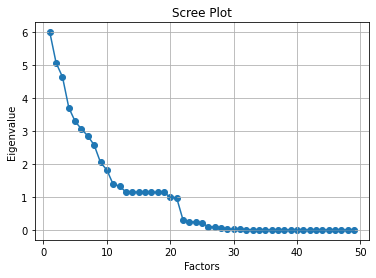

In [58]:
plt.scatter(range(1,internalMetrics_df.shape[1]+1),ev)
plt.plot(range(1,internalMetrics_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Clustering

In [61]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(internalMetrics_fa)

KMeans(n_clusters=4)

In [62]:
# 결과 확인
result = internalMetrics_fa.copy()
result["cluster"] = kmeans.labels_
result.head()

,0,1,2,3,4,5,6,7,8,9,10,cluster
uptime_in_seconds,0.039230,0.016201,-0.032935,-0.273863,0.049427,0.001371,-0.003648,0.012508,0.389007,-0.398367,0.009554,1
hz,0.013171,-0.009289,-0.007071,-0.105131,-0.052694,0.014813,0.090017,-0.171128,-0.036463,0.907716,-0.013724,1
configured_hz,0.013171,-0.009289,-0.007071,-0.105131,-0.052694,0.014813,0.090017,-0.171128,-0.036463,0.907716,-0.013724,1
lru_clock,0.008557,0.005001,-0.019357,0.016022,-0.145342,0.014209,-0.002761,-0.013476,0.975268,0.070503,-0.001093,1
client_recent_max_input_buffer,0.008404,0.003494,-0.000502,-0.022661,0.002691,-0.004907,0.006213,-0.014281,0.011602,0.056623,-0.008200,1


In [63]:
result['cluster'].value_counts()

1    36
2     5
3     4
0     4
Name: cluster, dtype: int64

In [65]:
result[result['cluster'] == 3]

,0,1,2,3,4,5,6,7,8,9,10,cluster
used_memory_rss,0.091715,0.024097,0.992793,0.015814,-0.009255,-0.009510,0.037154,0.023539,-0.024579,-0.015843,0.021055,3
used_memory_rss_human,0.092365,0.023717,0.992734,0.016224,-0.009084,-0.009420,0.037121,0.022862,-0.025137,-0.015702,0.020944,3
mem_fragmentation_ratio,0.146279,0.022257,0.820369,-0.020066,-0.018292,-0.000158,0.016505,-0.089434,-0.004867,0.042906,0.006644,3
mem_fragmentation_bytes,0.087391,0.030024,0.977447,-0.036021,-0.009461,-0.010993,0.014177,-0.173257,-0.032206,0.002549,0.019849,3
